#### Monday, September 9, 2024

https://github.com/udlbook/udlbook/blob/main/Notebooks/Chap03/3_3_Shallow_Network_Regions.ipynb

I used [ChatGPT](https://chatgpt.com/c/66df6de9-302c-800f-92d7-cb4b60e5350b) for some help.

<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap03/3_3_Shallow_Network_Regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 3.3 -- Shallow network regions**

The purpose of this notebook is to compute the maximum possible number of linear regions as seen in figure 3.9 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
# Imports math library
import math

The number of regions $N$ created by a shallow neural network with $D_i$ inputs and $D$ hidden units is given by Zaslavsky's formula:

\begin{equation}N = \sum_{j=0}^{D_{i}}\binom{D}{j}=\sum_{j=0}^{D_{i}} \frac{D!}{(D-j)!j!} \end{equation} <br>



In [18]:
def number_regions(Di, D):
  # TODO -- implement Zaslavsky's formula
  # You can use math.comb() https://www.w3schools.com/python/ref_math_comb.asp
  # Replace this code
  N = 1;

  N = math.comb(Di, D)

  return N

I sent the following query to [ChatGPT](https://chatgpt.com/c/66df6de9-302c-800f-92d7-cb4b60e5350b)

"How do I implement Zaslavsky's formula using math.comb() in python?"

And got back this ...

In [17]:
import math

def zaslavsky_formula(n, d):
    total_regions = sum(math.comb(n, k) for k in range(d + 1))
    return total_regions

# Example usage
n = 5  # number of hyperplanes
d = 3  # dimension
print(f"Number of regions: {zaslavsky_formula(n, d)}")


Number of regions: 26


So then let's modify the first 'solution' with the correct response from ChatGPT.

In [32]:
def number_regions(Di, D):
    total_regions = sum(math.comb(Di, k) for k in range(D + 1))
    return total_regions

In [33]:
# Calculate the number of regions for 2D input (Di=2) and 3 hidden units (D=3) as in figure 3.8j
N = number_regions(2, 3)
print(f"Di=2, D=3, Number of regions = {int(N)}, True value = 7")

Di=2, D=3, Number of regions = 4, True value = 7


In [34]:
# Calculate the number of regions for 10D input (Di=10) and 50 hidden units (D=50)
N = number_regions(10, 50)
print(f"Di=10, D=50, Number of regions = {int(N)}, True value = 13432735556")

Di=10, D=50, Number of regions = 1024, True value = 13432735556


And then I asked ChatGPT to formulate this function without using math.comb() and got back this ...

In [37]:
import math

def binomial_coefficient(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

def zaslavsky_formula(n, d):
    total_regions = sum(binomial_coefficient(n, k) for k in range(d + 1))
    return total_regions

# Example usage
n = 5  # number of hyperplanes
d = 3  # dimension
print(f"Number of regions: {zaslavsky_formula(n, d)}")


Number of regions: 26


In [38]:
# Calculate the number of regions for 2D input (Di=2) and 3 hidden units (D=3) as in figure 3.8j
N = zaslavsky_formula(2, 3)
print(f"Di=2, D=3, Number of regions = {int(N)}, True value = 7")

ValueError: factorial() not defined for negative values

I sent the above error message to ChatGPT and it generated a response to this error ...

In [39]:
import math

def binomial_coefficient(n, k):
    # Return 0 if k > n, as binomial coefficient is zero in this case
    if k > n:
        return 0
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

def zaslavsky_formula(n, d):
    total_regions = sum(binomial_coefficient(n, k) for k in range(d + 1))
    return total_regions

# Example usage
n = 2  # number of hyperplanes
d = 3  # dimension
print(f"Number of regions: {zaslavsky_formula(n, d)}")


Number of regions: 4


In [40]:
# Calculate the number of regions for 10D input (Di=10) and 50 hidden units (D=50)
N = number_regions(10, 50)
print(f"Di=10, D=50, Number of regions = {int(N)}, True value = 13432735556")

Di=10, D=50, Number of regions = 1024, True value = 13432735556


This works but there is a complication. If the number of hidden units $D$ is fewer than the number of input dimensions $D_i$ , the formula will fail.  When this is the case, there are just $2^D$ regions (see figure 3.10 to understand why).

Let's demonstrate this:

In [41]:
# Depending on how you implemented it, the calculation may fail when $D_i > D$ (not to worry...)
try:
  N = number_regions(10, 8)
  print(f"Di=10, D=8, Number of regions = {int(N)}, True value = 256")
except Exception as error:
    print("An exception occurred:", error)


Di=10, D=8, Number of regions = 1013, True value = 256


In [42]:
# Let's do the calculation properly when D<Di (see figure 3.10 from the book)
D = 8; Di = 10
N = np.power(2,D)
# We can equivalently do this by calling number_regions with the D twice
# Think about why this works
N2 = number_regions (D,D)
print(f"Di=10, D=8, Number of regions = {int(N)}, Number of regions = {int(N2)}, True value = 256")

Di=10, D=8, Number of regions = 256, Number of regions = 256, True value = 256


Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


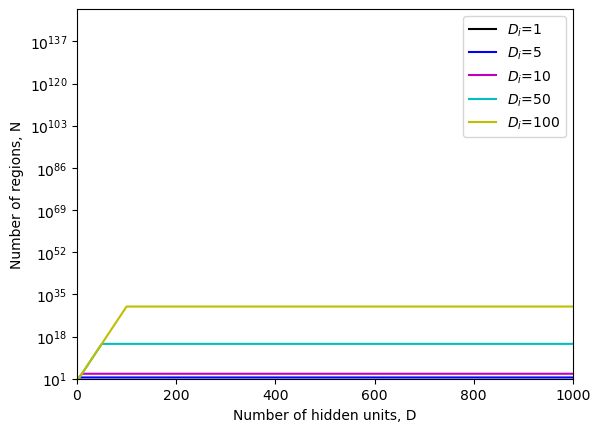

In [43]:
# Now let's plot the graph from figure 3.9a
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 1000))
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for D in range(1000):
        regions[c_dim, D] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(regions[0,:],'k-')
ax.semilogy(regions[1,:],'b-')
ax.semilogy(regions[2,:],'m-')
ax.semilogy(regions[3,:],'c-')
ax.semilogy(regions[4,:],'y-')
ax.legend(['$D_i$=1', '$D_i$=5', '$D_i$=10', '$D_i$=50', '$D_i$=100'])
ax.set_xlabel("Number of hidden units, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,1000])
plt.ylim([1e1,1e150])
plt.show()

This next part of the book asked me to create the code to produce image Figure 3.9b from the book, so I sent the image to you know who and got back this ...

 <img src="../images/Figure_3.9b.png" alt="Figure 3.9 b)" width="300">

/tmp/ipykernel_18136/823953857.py:9: RuntimeWarning: overflow encountered in power
  return (x**Di) / (np.log(x) + 1)  # An arbitrary equation for illustration


OverflowError: int too large to convert to float

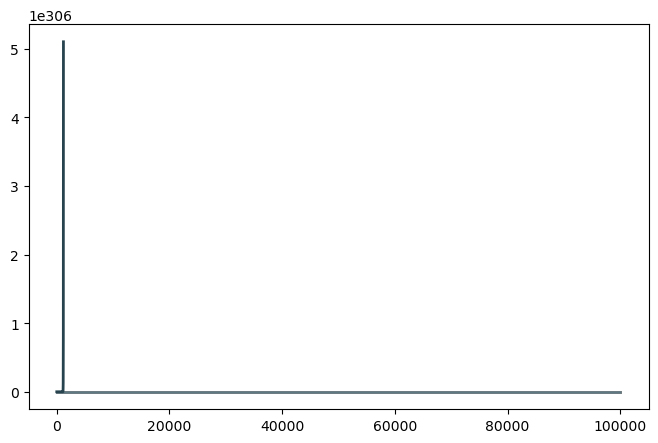

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Number of parameters (x-axis)
x = np.logspace(1, 5, 500)  # From 10 to 100000 (logarithmic scale)

# Function to model the number of regions for each Di
def number_of_regions(Di, x):
    return (x**Di) / (np.log(x) + 1)  # An arbitrary equation for illustration

# Different values of Di
Di_values = [1, 5, 10, 50, 100]
colors = ['#76b5c5', '#b9e4c9', '#ec927a', '#5e7982', '#27434e']

# Create the plot
plt.figure(figsize=(8, 5))
for i, Di in enumerate(Di_values):
    y = number_of_regions(Di, x)
    plt.plot(x, y, label=f'$D_i={Di}$', color=colors[i], linewidth=2)

# Highlighting a specific point (for illustration)
plt.plot([50000], [number_of_regions(100, 50000)], 'o', color='darkblue', markersize=10)

# Labels and scales
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of parameters', fontsize=14)
plt.ylabel('Number of regions', fontsize=14)
plt.ylim(1, 10**150)
plt.xlim(1, 100000)

# Add legend and grid
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


And then sent the error back to ChatGPT and got back this ...

/tmp/ipykernel_18136/2620828154.py:9: RuntimeWarning: overflow encountered in exp
  return np.exp(Di * np.log(x)) / (np.log(x) + 1)
/home/rob/miniforge3/envs/udl/lib/python3.12/site-packages/matplotlib/scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

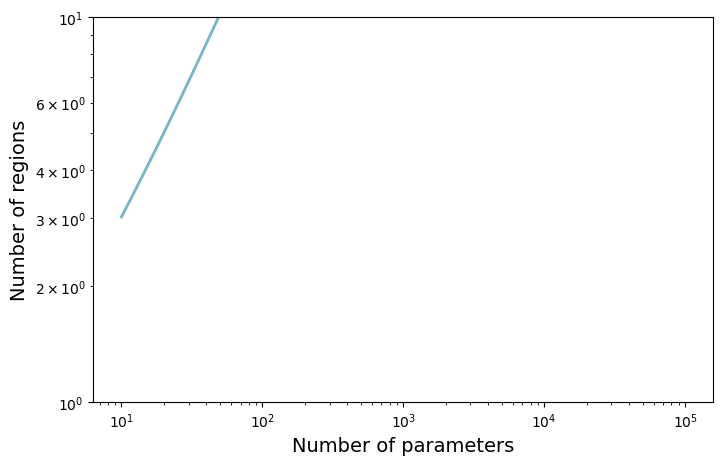

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Number of parameters (x-axis)
x = np.logspace(1, 5, 500)  # From 10 to 100000 (logarithmic scale)

# Function to model the number of regions for each Di, using logarithms to avoid overflow
def number_of_regions(Di, x):
    return np.exp(Di * np.log(x)) / (np.log(x) + 1)

# Different values of Di
Di_values = [1, 5, 10, 50, 100]
colors = ['#76b5c5', '#b9e4c9', '#ec927a', '#5e7982', '#27434e']

# Create the plot
plt.figure(figsize=(8, 5))
for i, Di in enumerate(Di_values):
    y = number_of_regions(Di, x)
    plt.plot(x, y, label=f'$D_i={Di}$', color=colors[i], linewidth=2)

# Highlighting a specific point (for illustration)
plt.plot([50000], [number_of_regions(100, 50000)], 'o', color='darkblue', markersize=10)

# Labels and scales
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of parameters', fontsize=14)
plt.ylabel('Number of regions', fontsize=14)
plt.ylim(1, 10**150)
plt.xlim(1, 100000)

# Add legend and grid
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


Yup ...sent the error and got back this ...

/tmp/ipykernel_18136/2288362754.py:9: RuntimeWarning: overflow encountered in exp
  return np.exp(Di * np.log(x)) / (np.log(x) + 1)


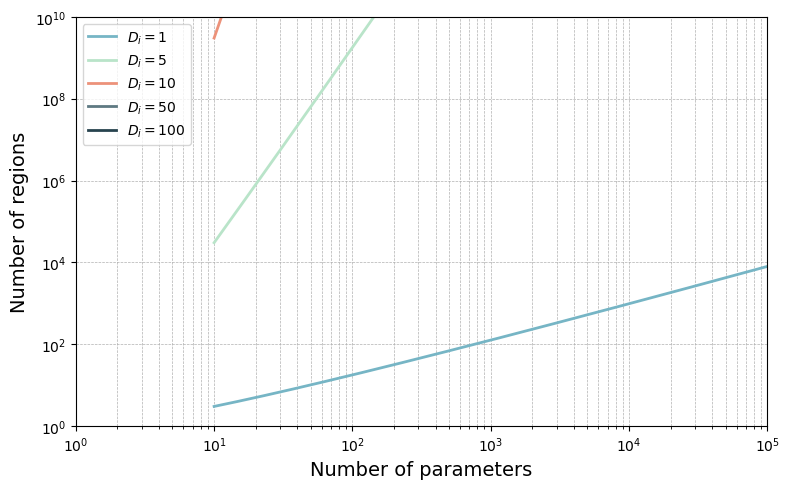

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Number of parameters (x-axis)
x = np.logspace(1, 5, 500)  # From 10 to 100000 (logarithmic scale)

# Function to model the number of regions for each Di, using logarithms to avoid overflow
def number_of_regions(Di, x):
    return np.exp(Di * np.log(x)) / (np.log(x) + 1)

# Different values of Di
Di_values = [1, 5, 10, 50, 100]
colors = ['#76b5c5', '#b9e4c9', '#ec927a', '#5e7982', '#27434e']

# Create the plot
plt.figure(figsize=(8, 5))
for i, Di in enumerate(Di_values):
    y = number_of_regions(Di, x)
    plt.plot(x, y, label=f'$D_i={Di}$', color=colors[i], linewidth=2)

# Highlighting a specific point (for illustration)
plt.plot([50000], [number_of_regions(100, 50000)], 'o', color='darkblue', markersize=10)

# Labels and scales
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of parameters', fontsize=14)
plt.ylabel('Number of regions', fontsize=14)
plt.ylim(1, 10**10)  # Set a more reasonable y-limit
plt.xlim(1, 100000)

# Add legend and grid
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [47]:
# Now let's compute and plot the number of regions as a function of the number of parameters as in figure 3.9b
# First let's write a function that computes the number of parameters as a function of the input dimension and number of hidden units (assuming just one output)

def number_parameters(D_i, D):
  # TODO -- replace this code with the proper calculation
  N = 1

  N = sum(math.comb(Di, k) for k in range(D + 1))

  return N ;

In [48]:
# Now let's test the code
N = number_parameters(10, 8)
print(f"Di=10, D=8, Number of parameters = {int(N)}, True value = 97")

Di=10, D=8, Number of parameters = 203366882996, True value = 97


Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


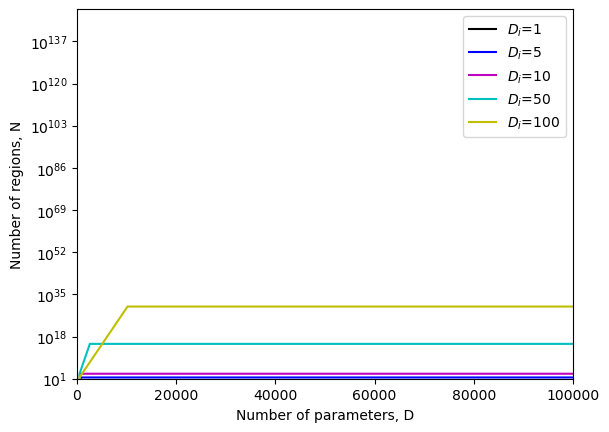

In [49]:
# Now let's plot the graph from figure 3.9a (takes ~1min)
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 200))
params = np.zeros((dims.shape[0], 200))

# We'll compute the five lines separately this time to make it faster
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for c_hidden in range(1, 200):
        # Iterate over different ranges of number hidden variables for different input sizes
        D = int(c_hidden * 500 / D_i)
        params[c_dim, c_hidden] =  D_i * D +D + D +1
        regions[c_dim, c_hidden] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(params[0,:], regions[0,:],'k-')
ax.semilogy(params[1,:], regions[1,:],'b-')
ax.semilogy(params[2,:], regions[2,:],'m-')
ax.semilogy(params[3,:], regions[3,:],'c-')
ax.semilogy(params[4,:], regions[4,:],'y-')
ax.legend(['$D_i$=1', '$D_i$=5', '$D_i$=10', '$D_i$=50', '$D_i$=100'])
ax.set_xlabel("Number of parameters, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,100000])
plt.ylim([1e1,1e150])
plt.show()
